<h1>6. Clustering on the <i>User Report:</i> free text column.</h1>
<HR WIDTH="100%" size="6">

This notebook presents the code for clustering the free text column on the <i>User Report:</i>. Clustering using <b>k-means</b> and a <b>Principal Components Analysis (PCA)</b> projection coloured by the cluster labels is applied. The actions preformed are set out in the table.


<table>
  <tr>
    <td><b>Step</b></td>
    <td><b>Description</b></td>
  </tr>
  <tr> 
  <td><b>6.1</b> Read in dataset and subset.</td>
    <td>The datset is read in. Similar to the Classification procedure, the dataset is subsetted based on <i> Language:,Language Pencentage, User Admin:</i> columns. In addition only records submitted for one calendar year, 2012 are retained.</td>
  </tr>
  <tr>
  <td><b>6.2</b> Visualise the distribution of the string lenght of the <i>User Report:</i> entries.</td>
  <td>The string lenght for <i>User Report:</i> is calculated and a histogram of it is created using method for the <b>Seaborn</b> package. </td>
  </tr>
  <tr>  
  <td><b>6.3</b> Drop Outliers</td>
  <td><i>User Report:</i> records of character length greater than 5,000 are removed.</td>
  </tr>
  <tr> 
      <td><b>6.4</b> Created Working Data Frame</td>
      <td><i>User Report:</i> and a series of columns copied to new working data frame</td>
  </tr>
  <tr> 
  <td><b>6.5</b> Vectorize <i>User Report:</i></td>
  <td>English words only, no numbers, all punctuation is replaced with shite space. String is broken into words/tokens, english stop words removed. Porter stemming applied. </td>
  </tr>
  <tr> 
      <td><b>6.6 </b>k-means Clustering and PCA</td>
      <td>k-Means cluster (k=3) and PCA applied to the vectorized data. Cluster lables and first two components of PCA merged to the data frame.</td>
  </tr>
  <tr> 
      <td><b>6.7</b> Function: Define ColorMap Breaks</td>
      <td>Create a function that returns a hex values of RGBA colour. Use the number of levels/factors of an attribute to determine the splits. </td>
  </tr>
  <tr> 
      <td><b>6.8</b> Plot PCA</td>
      <td>Plot the 1st and 2nd PCA components on a scatter plot. Color the points based on a selection of columns with nominal data.</td>
  </tr>
  <tr> 
      <td><b>6.9</b> Tage Words</td>
      <td>Tag each word in <i>User Report</i> with its' part of speech tag. Filter only those words what are nouns and adjectives.</td>
  </tr>
  <tr> 
      <td><b>6.10</b> Strings for Word Clouds</td>
      <td>Create strings for passing to word clouds</td>
  </tr>
  <tr> 
      <td><b>6.11</b> Word Cloud</td>
      <td>Create a matrix of word clouds, drilling further into the wordcloud each time based on word counts.</td>
  </tr>
   </table>

<table align='left'>
   <tr>
   <th colspan="4"><p style="text-align: center;">Packages Used</p></th>
  </tr>
  <tr style="background-color:azure">
    <td>Package</td>
    <td>Pre-installed with Anaconda</td>
    <td>Install instruction from command line</td>
    <td>Documentation Link</td>
    </tr>
    <tr>
    <td>pandas</td>
    <td><p style="text-align: center;">&#10004;</p></td>
    <td></td>
    <td>http://pandas.pydata.org/</td>
   </tr>
   <tr>
   <td>matplotlib</td>
    <td><p style="text-align: center;">&#10004;</p></td>
    <td></td>
    <td>http://matplotlib.org/index.html</td>
    </tr>
    <tr>
    <td>seaborn</td>
    <td><p style="text-align: center;">&#x2718;</p></td>
    <td>pip install seaborn</td>
    <td>http://stanford.edu/~mwaskom/software/seaborn/</td>
    </tr>
    <tr>
   <td>numpy</td>
    <td><p style="text-align: center;">&#10004;</p></td>
    <td></td>
    <td>http://www.numpy.org/</td>
   </tr>
   <tr>
   <td>nltk</td>
    <td><p style="text-align: center;">&#10004;</p></td>
    <td></td>
    <td>http://www.nltk.org/</td>
   </tr>
    <tr>
    <td>re</td>
    <td colspan="2"> <p> Part of the Python Standard Library</p></td>
    <td>https://docs.python.org/2/library/re.html</td>
    </tr>
    <tr>
    <td>string</td>
    <td colspan="2"> <p> Part of the Python Standard Library</p></td>
    <td>https://docs.python.org/2/library/string.html</td>
    </tr>
    <tr>
   <td>scikit-learn</td>
    <td><p style="text-align: center;">&#10004;</p></td>
    <td></td>
    <td>http://scikit-learn.org/stable/</td>
   </tr>
   <tr>
    <td>collections</td>
    <td colspan="2"> <p> Part of the Python Standard Library</p></td>
    <td>https://docs.python.org/2/library/collections.html</td>
   </tr>
   <tr>
    <td>word_cloud</td>
    <td><p style="text-align: center;">&#x2718;</p></td>
    <td>sudo pip install git+git://github.com/amueller/word_cloud.git</td>
    <td>https://github.com/amueller/word_cloud</td>
    </tr>
    </table><br clear="left"/>



 <HR WIDTH="100%" size="6">
 


 

<h3>6.1 Read in data & filter rows </h3>

In [63]:
import pandas as pd

df=pd.read_csv("Data/prReports.csv",encoding='utf-8') 

#Recode columns containing data information to DataTime Series.
#Allows for easier data manipulation.
df['Date Submitted:']=pd.to_datetime(df['Date Submitted:'])
df['Last Updated:']=pd.to_datetime(df['Last Updated:'])
df['Member Since:']=pd.to_datetime(df['Member Since:'])
df['Year']=(df['Date Submitted:']).map(lambda x: x.year)

#Subset the data

#Shorten to list of countries
country_list=['USA', 'Australia','England','Netherlands','Canada','Ireland','Scotland','Spain']

df=df[(df['Language:']=='en')&
      (df['Language Percentage:']>=0.99)&
      (df['User Admin:']==False)&(df['Year'].isin([2012,2013]))&
      df['Country:'].isin(country_list)]
df=df.drop(['Language:','Language Percentage:','User Admin:','mongo_id:'], 1)
df.shape

(1470, 34)

<h3>6.2 Visualise <i>User Report:</i> string length. </h3>

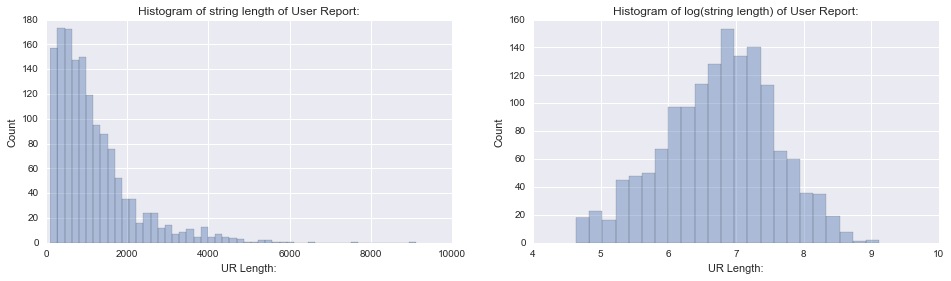

In [64]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

f, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 4))

sns.distplot(df['UR Length:'], kde=False,ax=ax1)
ax1.set_title("Histogram of string length of User Report:")
ax1.set_ylabel("Count")

sns.distplot(np.log(df['UR Length:']), kde=False,ax=ax2)
ax2.set_title("Histogram of log(string length) of User Report:")
ax2.set_ylabel("Count")



<h3>6.3 Drop outliers</h3>

In [67]:
#Drop anything greater than 5000 characters
#Subset the data
no_rows=df.shape[0]
df=df[(df['UR Length:']<=5000)]
print("Rows Removed: %0.0f" % (no_rows-df.shape[0]))


Rows Removed: 0


<h3>6.4 Create Working Data Frame.</h3>

In [68]:
clusterDF=pd.DataFrame()
clusterDF['ID']=df['ID:']
clusterDF['User Report']=df['User Report:']
clusterDF['Warning']=df['Warning:']
clusterDF['Country']=df['Country:']
clusterDF['SC Category']=df['SC Category:']
clusterDF['Weekday']=(df['Date Submitted:']).map(lambda x: x.strftime('%a'))
clusterDF['UR Len Split']= pd.qcut(df['UR Length:'],3).astype(object) #Requires type as object for pandas 0.17


clusterDF.head()

,ID,User Report,Warning,Country,SC Category,Weekday,UR Len Split
967,32859,My user report cannot be accurate as I was tak...,no,Scotland,mdxx,Mon,"[103, 621.667]"
971,32851,"Wanting to chase 'the clean high', we decided ...",no,Scotland,mdxx,Sun,"(621.667, 1260.667]"
973,32849,Sorry for not posting a picture but me and my ...,yes,Australia,other,Sat,"(1260.667, 4863]"
976,32842,i consumed the pill around 10pm and about 10:4...,no,Australia,mdxx,Fri,"[103, 621.667]"
979,32836,"Okay, i got sick and tired of waiting for a co...",no,Australia,mdxx,Fri,"(1260.667, 4863]"


<h3>6.5 Set up Vectorizer</h3>

<p>Set up the vectorizer for transforming <i>User Report:</i> to vector representation.

In [69]:
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
import string

stemmer = PorterStemmer()

def tokenize_stem(text):
    
    #Replace all punctuation with white space before tokenizing. May reduce meaning of hypenhated words.
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    no_punc = regex.sub(' ', text)
   
    #Toeknize the words, split by white space. Plenty of white space introduced above!
    tokens = word_tokenize(no_punc.lower())
 
    # longwords=[] # for item in tokens:   #check=re.search(r"[a-zA-Z0-9]{2,30}",item) #if check: #longwords.append(check.group())
    
    #Strip out english stop words
    filtered_words = [w for w in tokens if not w in stopwords.words('english')]
    
    #Stem the words. 
    stemmed = [] #List to hold the words
    
    #Iterate over the words in tn the text and stem.
    for item in filtered_words:
        stemmed.append(stemmer.stem(item))
      
    return stemmed

#Using tf_idf vectorizer but control for the multiple occurence of word within one document 
#with binary=True, only weight for occurence across the corpus.
from sklearn.feature_extraction.text import TfidfVectorizer
vec_tfidf = TfidfVectorizer(binary=True,tokenizer=tokenize_stem,max_df=0.95,min_df=0.05)

#Alternative vectorizer - using binary occurence, no weighting for words occuernce across corpus
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(binary=True,tokenizer=tokenize_stem,max_df=0.95,min_df=0.05)

vec_tfidf.fit(clusterDF['User Report'])
data = vec_tfidf.transform(clusterDF['User Report'])
print data.shape

(1458, 382)


<h3>6.6 Peformn Clustering and PCA on the Data</h3>

Principal Component Analysis and Clustering Applied to the transformed <i>User Report</i> field.

In [70]:
from sklearn import cluster
from sklearn.decomposition import PCA

#Clustering
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(data)
clusterDF['Cluster']=kmeans.labels_

#PCA
pca = PCA(n_components=2)
UR_PCA = pca.fit(data.todense()).transform(data.todense())

variance=sum(pca.explained_variance_ratio_)

clusterDF['PC1']=UR_PCA[:,0]
clusterDF['PC2']=UR_PCA[:,1]


print('Explained variance ratio of the first two components: %s'% variance)

Explained variance ratio of the first two components: 0.0368207018267


<h3>6.7 Function to define color breaks</h3>

User defined function, to read in matplotlib colour map ('<b>hsv</b>') and break this up depending on the number of levels per plot.

In [71]:
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
colormap = plt.get_cmap('hsv') 


#@colormap is set
#@breaks varied depending on number of levels. E.g. Warning: yes|no has two levels.

def colors_at_breaks(colormap, breaks):
    return [rgb2hex(colormap(x)) for x in breaks]

#Code for color breaks based on answer to;
#http://stackoverflow.com/questions/19322768/how-to-determine-colors-at-intervals-in-a-matplotlib-colormap

<h3>6.8 Plot PCA </h3>

<p> First two principal components plotted and colored by a list of nominal variables. 
The number of levels in a nominal variable is used to break the color scale, set out above function.</p>

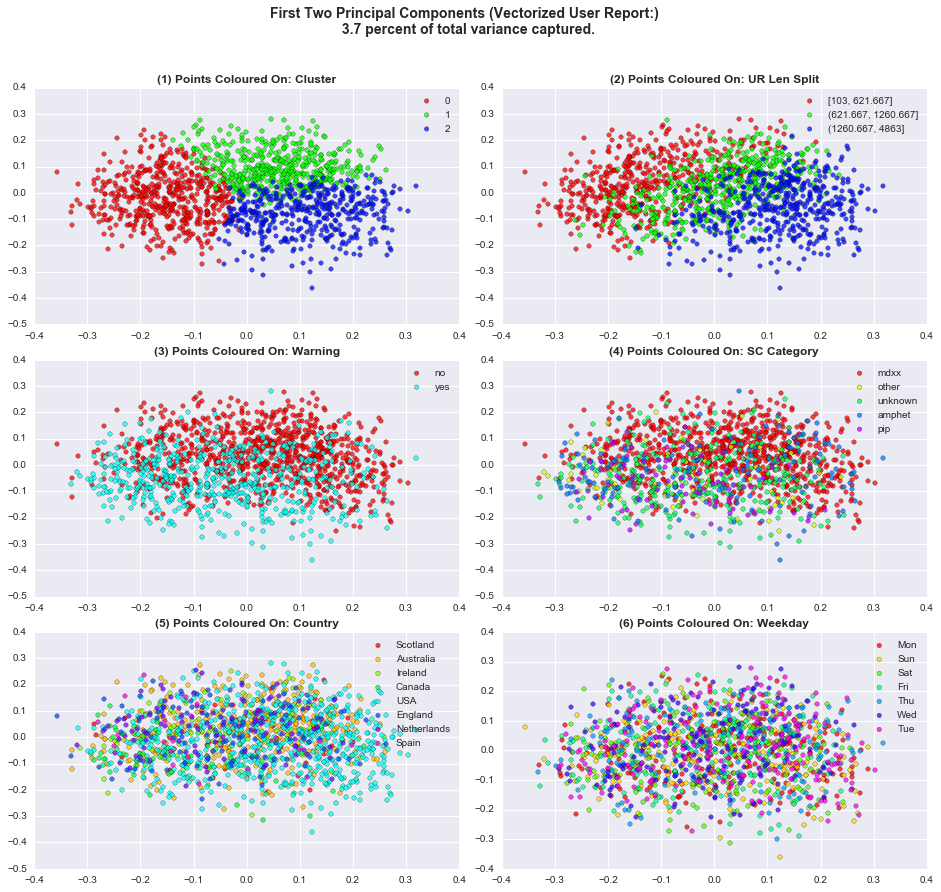

In [76]:
columnlist=['Cluster','UR Len Split','Warning','SC Category','Country','Weekday'] #'Tested'

#Create plot with 3 rows and 2 columns
fig, axs = plt.subplots(3,2, figsize=(16, 14), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .15, wspace=.1)
plt.suptitle(("First Two Principal Components (Vectorized User Report:) \n %0.1f percent of total variance captured."
            % (variance*100)), fontsize=14,fontweight='bold')  


#Create index of all the subplots.
axs = axs.ravel()

for col in range(len(columnlist)):
    
    levelslist=clusterDF[columnlist[col]].unique().tolist()
    split=float(1.0/(len(clusterDF[columnlist[col]].unique().tolist())))
    breaks=np.arange(0.0,1.0,split)
    colors=colors_at_breaks(colormap,breaks)
    
    plt.figure()
    for c, i, target_name in zip(colors, levelslist, levelslist):
        axs[col].scatter(clusterDF['PC1'][(clusterDF[columnlist[col]]==i)],
                    clusterDF['PC2'][(clusterDF[columnlist[col]]==i)],c=c,label=target_name,alpha=0.75)
        axs[col].set_title("("+(str(col+1)+") Points Coloured On: "+columnlist[col]),fontweight='bold')
        axs[col].legend()
           
    
 
#Uncomment to save the figure
#fig.savefig('img6_8_new.png',dpi=96,bbox_inches='tight') 

<h3>6.9 Tag Worlds </h3>

<p>Using <b>nltk pos_tagger</b> tag each word in the <i>User Report:</i> column and save to new column <i>Tagged:</i> <p>
<p>Select only nouns and adjectives and save to new column <i>Rich_words</i>

In [73]:
from nltk import pos_tag
clusterDF['Tagged']=(clusterDF['User Report']).map(lambda x: pos_tag(word_tokenize(x)))
clusterDF['Rich_words']=(clusterDF['Tagged']).map(lambda x: ' '.join([y[0].lower() for y in x if y[1] in ['JJ','NN']]))

In [74]:
clusterDF.head()

,ID,User Report,Warning,Country,SC Category,Weekday,UR Len Split,Cluster,PC1,PC2,Tagged,Rich_words
967,32859,My user report cannot be accurate as I was tak...,no,Scotland,mdxx,Mon,"[103, 621.667]",0,-0.282731,0.009387,"[(My, PRP$), (user, NN), (report, NN), (can, M...",user report accurate other pill little effect
971,32851,"Wanting to chase 'the clean high', we decided ...",no,Scotland,mdxx,Sun,"(621.667, 1260.667]",1,0.129142,0.143785,"[(Wanting, VBG), (to, TO), (chase, VB), ('the,...",'the clean high alcohol pill comfortable bit c...
973,32849,Sorry for not posting a picture but me and my ...,yes,Australia,other,Sat,"(1260.667, 4863]",2,-0.032830,-0.194663,"[(Sorry, NNP), (for, IN), (not, RB), (posting,...",picture description first time bad research ma...
976,32842,i consumed the pill around 10pm and about 10:4...,no,Australia,mdxx,Fri,"[103, 621.667]",0,-0.192165,0.200437,"[(i, PRP), (consumed, VBD), (the, DT), (pill, ...",pill drop blast night good n
979,32836,"Okay, i got sick and tired of waiting for a co...",no,Australia,mdxx,Fri,"(1260.667, 4863]",1,0.150784,0.053170,"[(Okay, NNP), (,, ,), (i, PRP), (got, VBD), (s...",sick tired confirmation strength white mate no...


In [75]:
#Used in notebook 7
clusterDF.to_pickle("Data/clusterDF")

<h3>6.10 Join words for word cloud</h3>

<p> Create strings of all words based on the <i>SC Category</i> label for passing to a wordcloud <p>

<p> Using <b>collections</b> module, create a dictionary with a count of top words. Counts are used for filtering top terms in the word cloud<p> 

In [23]:
words =  ' '.join(clusterDF['Rich_words'][(clusterDF['PC1']>=-1)&
                                       (clusterDF['PC1']<=1)])

words1 = ' '.join(clusterDF['Rich_words'][(clusterDF['SC Category']=='mdxx')&
                                       (clusterDF['PC1']>=-1)&
                                       (clusterDF['PC1']<=1)])

words2 = ' '.join(clusterDF['Rich_words'][(clusterDF['SC Category']=='amphet')&
                                       (clusterDF['PC1']>=-1)&
                                       (clusterDF['PC1']<=1)])

words3 = ' '.join(clusterDF['Rich_words'][(clusterDF['SC Category'].isin(['unknown']))&
                                       (clusterDF['PC1']>=-1)&
                                       (clusterDF['PC1']<=1)])

  
print('Str. Len. of Words where "SC Category = mdxx": %0.0f'% len(words1))       
print('Str. Len. of Words where "SC Category = amphet": %0.0f'% len(words2))
print('Str. Len. of Words where "SC Category = unknown": %0.0f'% len(words3))   
print('String Length of All Words:: %0.0f'% len(words)) 


#Create a dictionary with words as keys and counts as values.
from collections import defaultdict
word_counts = defaultdict(int)

for w in word_tokenize(words):
        word_counts[w] += 1

#Create an list of lists ordered by word count.   
unique_words=len(word_counts)        
top_words =  sorted(word_counts.iteritems(),key=lambda(word, count): (-count, word))[:unique_words]     

print ("Count of all words: %0.0f"%(sum(word_counts.values())))
print ("Count of unqiue words: %0.0f"%(len(word_counts)))
print ("Top five words: \n"), top_words[1:5]

Str. Len. of Words where "SC Category = mdxx": 250218
Str. Len. of Words where "SC Category = amphet": 48048
Str. Len. of Words where "SC Category = unknown": 90918
String Length of All Words:: 437907
Count of all words: 70493
Count of unqiue words: 7103
Top five words: 
[(u'good', 1454), (u'time', 1072), (u'night', 902), (u'bit', 704)]


<h3>6.11 3x3 Visualisastion of Word Cloud</h3>

<p>Using the <b>WordCloud</b> package created by A.Mueller https://github.com/amueller/word_cloud loop through and plot a matrix of wordcloud incrementing the number of stop words.</p>

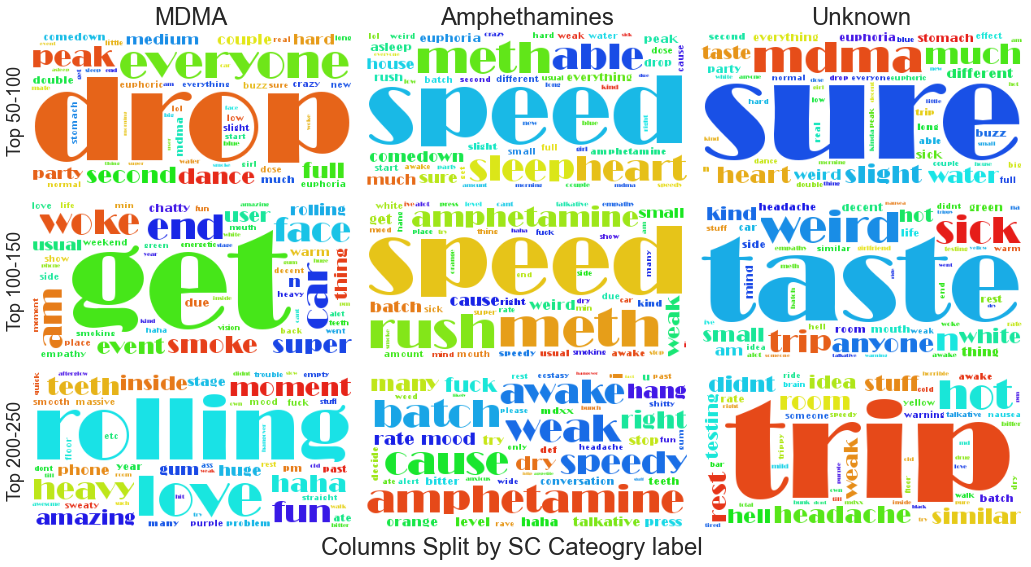

In [43]:
from wordcloud import WordCloud


#User defined function for drilling further placing the selecting which string for the wordcloud, 
#The number of stopwords and the number of words to display are updated at each iteration.

def gen_wc(i,stops,display):
    
    more_stopwords = [x[0] for x in top_words[0:stops]]
    #Add some extra words, for tailoring each word cloud. 
    more_stopwords.extend(['week','while','overall','easy','amp','sort','fine','kit','safe','guy'])
    
    if i in [1,4,7]:
        wc = WordCloud(background_color="white", max_words=display,
               stopwords=more_stopwords,font_path="BROADW.TTF").generate(words1)
           
    
    if i in [2,5,8]:
        wc = WordCloud(background_color="white", max_words=display,
               stopwords=more_stopwords,font_path="BROADW.TTF").generate(words2)
       
         
    if i in [3,6,9]:
       wc = WordCloud(background_color="white", max_words=display,
               stopwords=more_stopwords,font_path="BROADW.TTF").generate(words3)
        
    return (wc)


#Number of stop words and words to display
to_stop=50
to_display=50
cloudtitle=['MDMA','Amphethamines','Unknown']
cloudy=['Top 50-100','Top 100-150','Top 200-250']


fig, axs = plt.subplots(3,3, figsize=(18, 9), facecolor='w', edgecolor='k')
#axs.set_xlabel('common xlabel')
fig.text(0.5, 0.1, 'Columns Split by SC Cateogry label', ha='center', va='center',fontsize=24)
fig.subplots_adjust(hspace = .05, wspace=.00001)

axs = axs.ravel()

for i in range(9):
           
    wc_out=gen_wc(i+1,to_stop,to_display)
    axs[i].imshow(wc_out)
    if i in [0,1,2]:
        axs[i].set_title(cloudtitle[i],fontsize=24,fontweight=6)
    
    # axs[i].axis("off")
    if i in [0,3,6]:
        axs[i].set_ylabel(cloudy[i/3],fontsize=18,fontweight=3)
    
    #axs[i].axis("off") - removes the ylables
    axs[i].set_yticks([]) #-set tick marks to empty list.
    axs[i].set_xticks([])
    
    
    #Every third iteration update the number of stop words.
    if (i+1)%3==0:
        to_stop=to_stop+50
        to_display=to_display

#Uncomment to save the figure
#fig.savefig('img6_9.png',dpi=96,bbox_inches='tight') 